## 1: time step

/home/yanjun/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


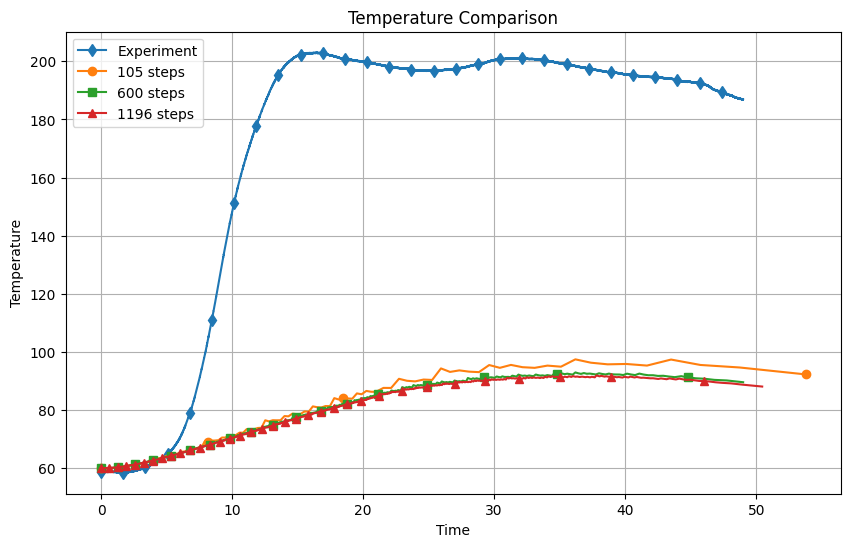

In [1]:
import os
import shutil
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# Source and destination directories
source_dir = '/home/yanjun/Documents/FEM_results/new_pressure/time_step'
destination_dir = '/home/yanjun/Documents/FEniCSx/Projecct/Data/new_pressure/time_step'

# Function to collect CSV files recursively
def collect_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

def extract_elements(file_name):
    match = re.search(r's-(\d+)', file_name)
    if match:
        return int(match.group(1))
    return 0

# Collect all CSV files from the destination directory
csv_files = collect_csv_files(source_dir)

for file in csv_files:
    shutil.copy(file, destination_dir)

# Sort CSV files based on the number of elements
csv_files.sort(key=lambda x: extract_elements(x))

# Plotting
plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)

i = 0
marker_styles = ['o', 's', '^', 'v', '>', '<' ] 
for csv_file in csv_files:
    # Read CSV file
    df = pd.read_csv(csv_file)
    
    # Extract data
    time_data = df.iloc[:, 1]  # Assuming time is in the second column (index 1)
    temperature_data = df.iloc[:, 2]  # Assuming temperature is in the third column (index 2)
    
    # Extract label from file name
    file_name = os.path.basename(csv_file)
    elements = extract_elements(file_name)
    label = f"{elements} steps"
    
    # Plot data
    plt.plot(time_data, temperature_data, label=label,marker= marker_styles[i],markevery=35)
    i += 1

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Comparison')
plt.legend()
plt.grid(True)
plt.savefig('T_ave_time_step.png')
plt.show()

### 1.1 average temperature

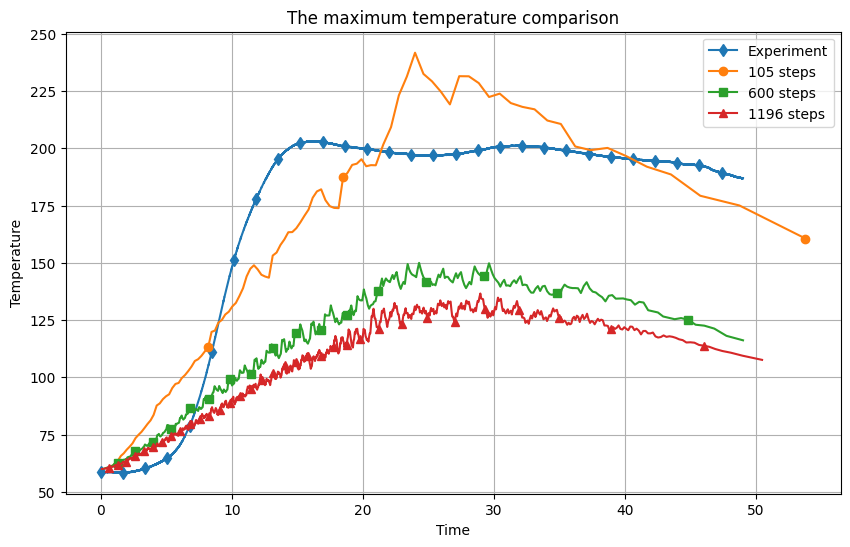

In [2]:
# Plotting
plt.figure(figsize=(10, 6))

marker_styles = ['o', 's', '^', 'v', '>', '<' ] 

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)


i = 0

for csv_file in csv_files:
    # Read CSV file
    df = pd.read_csv(csv_file)
    
    # Extract data
    time_data = df.iloc[:, 1]  # Assuming time is in the second column (index 1)
    temperature_data = df.iloc[:, 3]  # Assuming temperature is in the third column (index 2)

    average_temperature = temperature_data.rolling(window = 5).mean()
    
    # Extract label from file name
    file_name = os.path.basename(csv_file)
    elements = extract_elements(file_name)
    label = f"{elements} steps"
    
    # Plot data
    plt.plot(time_data, average_temperature, label=label,marker= marker_styles[i],markevery=35)
    i += 1

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('The maximum temperature comparison')
plt.legend()
plt.grid(True)
plt.savefig('T_max_time_step.png')
plt.show()

### 1.2 maximum temperature

## 2: mesh sensitivity

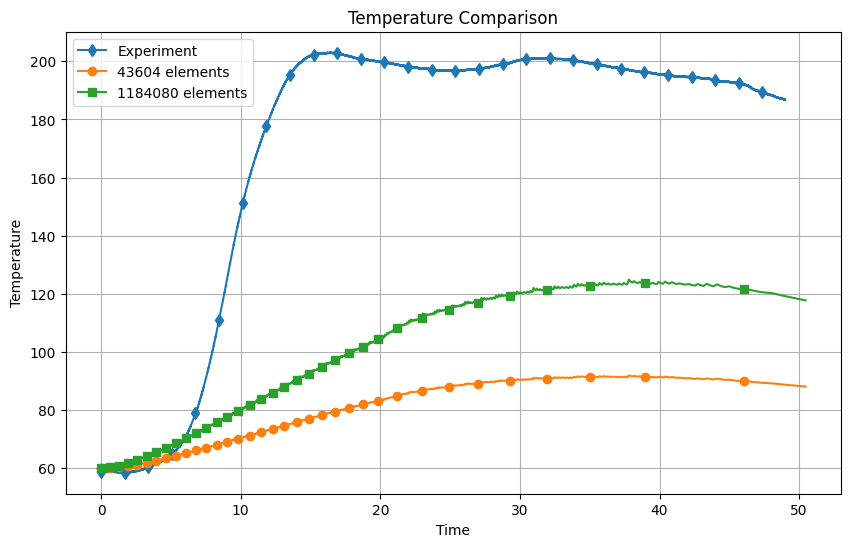

In [3]:
# Source and destination directories
source_dir = '/home/yanjun/Documents/FEM_results/new_pressure/mesh_sensitivity'
destination_dir = '/home/yanjun/Documents/FEniCSx/Projecct/Data/new_pressure/mesh_sensitivity'

# Function to collect CSV files recursively
def collect_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

def extract_elements(file_name):
    match = re.search(r'e-(\d+)', file_name)
    if match:
        return int(match.group(1))
    return 0

# Collect all CSV files from the destination directory
csv_files = collect_csv_files(source_dir)

#for file in csv_files:
#    shutil.copy(file, destination_dir)

# Sort CSV files based on the number of elements
csv_files.sort(key=lambda x: extract_elements(x))

plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)

# Plotting
i = 0
for csv_file in csv_files:
    # Read CSV file
    df = pd.read_csv(csv_file)
    
    # Extract data
    time_data = df.iloc[:, 1]  # Assuming time is in the second column (index 1)
    temperature_data = df.iloc[:, 2]  # Assuming temperature is in the third column (index 2)
    
    # Extract label from file name
    file_name = os.path.basename(csv_file)
    elements = extract_elements(file_name)
    label = f"{elements} elements"
    
    # Plot data
    plt.plot(time_data, temperature_data, label=label, marker= marker_styles[i],markevery=35)
    i += 1
  

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Comparison')
plt.legend()
plt.grid(True)
plt.savefig('T_ave_mesh.png')
plt.show()

### 2.1 average temperature

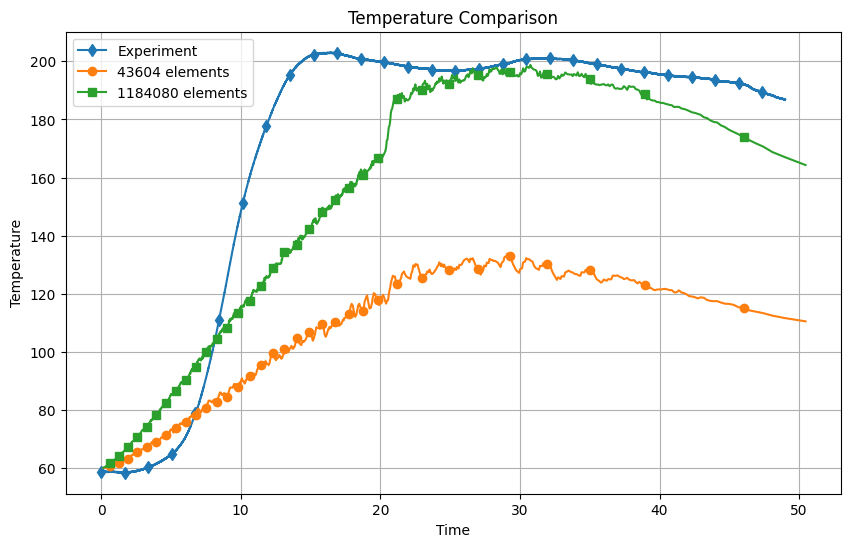

In [4]:
# Plotting
plt.figure(figsize=(10, 6))

i =0

marker_styles = ['o', 's', '^', 'v', '>', '<' ] 

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)

for csv_file in csv_files:
    # Read CSV file
    df = pd.read_csv(csv_file)
    
    # Extract data
    time_data = df.iloc[:, 1]  # Assuming time is in the second column (index 1)
    temperature_data = df.iloc[:, 3]  # Assuming temperature is in the third column (index 2)
    average_temperature = temperature_data.rolling(window = 10).mean()
    # Extract label from file name
    file_name = os.path.basename(csv_file)
    elements = extract_elements(file_name)
    label = f"{elements} elements"
    
    # Plot data
    plt.plot(time_data, average_temperature, label=label, marker= marker_styles[i],markevery=35)
    i += 1

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Comparison')
plt.legend()
plt.grid(True)
plt.savefig('T_max_mesh.png')
plt.show()

### 2.2 maximum temperature

## 3: contact area

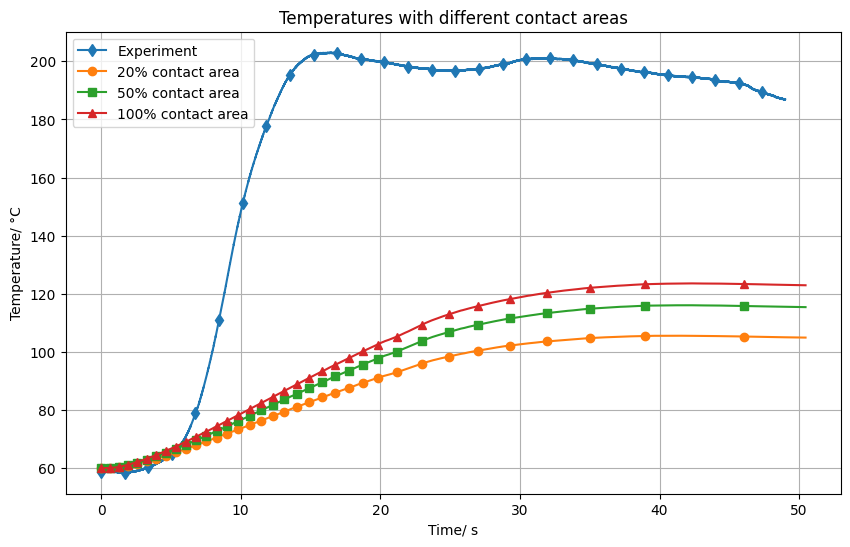

In [5]:
import os
import shutil
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# Source and destination directories
source_dir = '/home/yanjun/Documents/FEM_results/new_pressure/contact_area'
destination_dir = '/home/yanjun/Documents/FEniCSx/Projecct/Data/new_pressure/contact_area'

# Function to collect CSV files recursively
def collect_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files
    
# Collect all CSV files from the destination directory
csv_files = collect_csv_files(source_dir)


for file in csv_files:
    shutil.copy(file, destination_dir)
    

def extract_contact_area(file_name):
    label = file_name.split("c-")[1].split("-")[0]  # Extract the part after "c-"
    if label == '1':
        return 100
    else:
        return int(float(label) * 100)
        

csv_files.sort(key=lambda x: extract_contact_area(os.path.basename(x)))


plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)

i = 0

for csv_file in csv_files:
    # Extract label from file name
    label = os.path.basename(csv_file).split("c-")[1].split("-")[0]  # Extract the part after "c-"
    if label == '1':
        label = '100% contact area'
    else:
        label = f"{int(float(label) * 100)}% contact area"  # Convert "0.2" to "20% contact area"
    
    # Read CSV file
    df = pd.read_csv(csv_file)
    
    # Extract data
    time_data = df.iloc[:, 1]  # Assuming time is in the second column (index 1)
    temperature_data = df.iloc[:, 2]  # Assuming temperature is in the third column (index 2)

    rolling_mean = temperature_data.rolling(window=50, min_periods=0).mean()
    
    # Plot data
    plt.plot(time_data, rolling_mean, label=label, marker= marker_styles[i],markevery=35)
    i += 1
    

plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('Temperatures with different contact areas')
plt.legend()
plt.grid(True)
plt.savefig('T_ave_contact.png')
plt.show()

### 3.1 average temperature

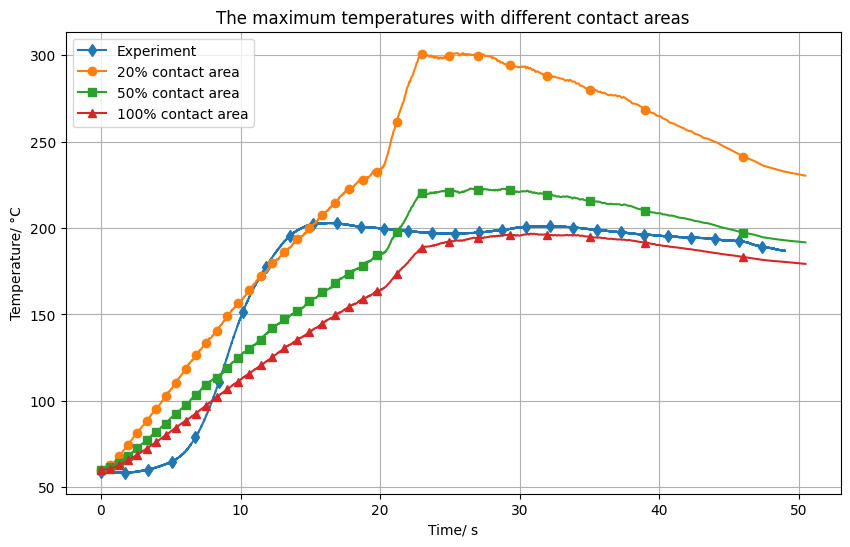

In [6]:
plt.figure(figsize=(10, 6))

marker_styles = ['o', 's', '^', 'v', '>', '<' ] 

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Projecct/Data/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
num_total = len(T_e_ave)
t_e = np.linspace (0, 49, num_total)
plt.plot(t_e, T_e_ave, label= "Experiment", marker='d',markevery=1000)

i = 0
for csv_file in csv_files:
    # Extract label from file name
    label = os.path.basename(csv_file).split("c-")[1].split("-")[0]  # Extract the part after "c-"
    if label == '1':
        label = '100% contact area'
    else:
        label = f"{int(float(label) * 100)}% contact area"  # Convert "0.2" to "20% contact area"
    
    # Read CSV file
    df = pd.read_csv(csv_file)
    
    # Extract data
    time_data = df.iloc[:, 1]  # Assuming time is in the second column (index 1)
    temperature_data = df.iloc[:, 3]  # Assuming temperature is in the third column (index 2)

    rolling_mean = temperature_data.rolling(window=50, min_periods=0).mean()
    
    # Plot data
    plt.plot(time_data, rolling_mean, label=label, marker= marker_styles[i],markevery=35)
    i += 1
     
    

plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('The maximum temperatures with different contact areas')
plt.legend()
plt.grid(True)
plt.savefig('T_max_contact.png')
plt.show()

### 3.2 maximum temperature